In [14]:
import pandas as pd
import numpy as np
import urllib.request
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
from pymystem3 import Mystem
from stop_words import get_stop_words
from transformers import pipeline

In [15]:
import os
from os.path import join
filename = join(os.environ["HOME"], "Datasets/yandex_maps_reviews.csv")

In [16]:
data_test_filename = join(os.environ["HOME"], "Datasets/yandex_data_for_llm.csv")
df = pd.read_csv(data_test_filename, sep=',', index_col=False, usecols=lambda column: column not in ['Unnamed: 0'])

In [17]:
df

,rating,text
0,5.0,Приятное место. Обедали компанией в субботу. М...
1,4.0,"Хорошее кафе, есть для детей игровой уголок и ..."
2,4.0,\n4 с минусом. Туалет это дичь просто. Если ты...
3,5.0,Прекрасное заведение и атмосфера. Все было оче...
4,5.0,"Вежливый персонал, быстрая скорость отдачи зак..."
...,...,...
27655,5.0,"Заказала доставку, всё привезли хорошо упакова..."
27656,5.0,Доброжелательное место с отличным интерьером и...
27657,5.0,Хорший ресторанчик на набережнрй Города-Героя ...
27658,5.0,"Вкусное кафе, относительно демократичные цены,..."


In [18]:
!pip install pymystem3

In [19]:
from PyMultiDictionary import MultiDictionary
dictionary = MultiDictionary() # does not support synonims

In [20]:
import nltk
from nltk.corpus import wordnet as wn
from pymystem3 import Mystem

In [24]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('omw')

[nltk_data] Downloading package punkt to /Users/k0tarak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/k0tarak/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/k0tarak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/k0tarak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package omw to /Users/k0tarak/nltk_data...


True

In [26]:
data_test_filename = join(os.environ["HOME"], "Datasets/yandex_data_for_llm.csv")
df_test = pd.read_csv(data_test_filename, sep=',', index_col=False, usecols=lambda column: column not in ['Unnamed: 0'])
df_test

,rating,text
0,5.0,Приятное место. Обедали компанией в субботу. М...
1,4.0,"Хорошее кафе, есть для детей игровой уголок и ..."
2,4.0,\n4 с минусом. Туалет это дичь просто. Если ты...
3,5.0,Прекрасное заведение и атмосфера. Все было оче...
4,5.0,"Вежливый персонал, быстрая скорость отдачи зак..."
...,...,...
27655,5.0,"Заказала доставку, всё привезли хорошо упакова..."
27656,5.0,Доброжелательное место с отличным интерьером и...
27657,5.0,Хорший ресторанчик на набережнрй Города-Героя ...
27658,5.0,"Вкусное кафе, относительно демократичные цены,..."


In [27]:
data_train_filename = join(os.environ["HOME"], "Datasets/yandex_data_train.csv")
df_train = pd.read_csv(data_train_filename, sep=',', index_col=False, usecols=lambda column: column not in ['Unnamed: 0'])
df_train

,rating,text
0,4.0,"Ресторан в центре Москвы, в замечательном мест..."
1,4.0,"Кухня не плохая, довольно таки вкусно. Но для ..."
2,5.0,"Отличный ресторан, попробовали очень много блю..."
3,4.0,"Бизнес-встречу здесь планировать провально , а..."
4,5.0,Завтракали в этом ресторане при гостинице. Все...
...,...,...
64532,4.0,"Чтобы получить отзыв 5,0 нужно очень постарат..."
64533,5.0,Очень уютное кафе! Была там несколько раз. Пер...
64534,3.0,"Невозможно заказать с доставкой, мало мест для..."
64535,5.0,"Доброжелательный персонал. Вкусная еда, хороша..."


In [28]:
df_all = pd.concat([df_train, df_test])

In [29]:
df_all

,rating,text
0,4.0,"Ресторан в центре Москвы, в замечательном мест..."
1,4.0,"Кухня не плохая, довольно таки вкусно. Но для ..."
2,5.0,"Отличный ресторан, попробовали очень много блю..."
3,4.0,"Бизнес-встречу здесь планировать провально , а..."
4,5.0,Завтракали в этом ресторане при гостинице. Все...
...,...,...
27655,5.0,"Заказала доставку, всё привезли хорошо упакова..."
27656,5.0,Доброжелательное место с отличным интерьером и...
27657,5.0,Хорший ресторанчик на набережнрй Города-Героя ...
27658,5.0,"Вкусное кафе, относительно демократичные цены,..."


In [30]:
stop_words = get_stop_words('russian')
def remove_russian_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

mystem = Mystem()
# Function to apply stemming to Russian text
def stem_russian_text(text):
    tokens = mystem.lemmatize(text)
    return ''.join(tokens)


def prepare(data):
    # Step 1: Remove punctuation from the text column
    data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

    # Step 2: Remove stop words from the text column
    data['text'] = data['text'].apply(remove_russian_stop_words)
    data['text'] = data['text'].apply(stem_russian_text)


In [31]:
prepare(df_all)
prepare(df_test)
prepare(df_train)

In [62]:
df_all = pd.concat([df_train, df_test])

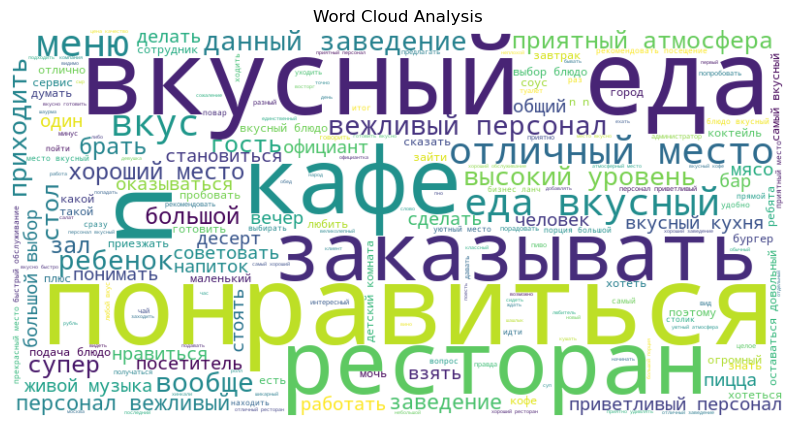

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plÍt

# Assuming your DataFrame is named 'df' and the column containing stemmed text is named 'stemmed_text'
text = ' '.join(df_all['text'])  # Concatenate all text from the column into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud Analysis')
plt.show()

In [33]:
vectorizer = TfidfVectorizer()
vectorizer.fit(df_all['text'])

TfidfVectorizer()

In [74]:
X_train = vectorizer.transform(df_train['text'])
y_train = df_train['rating'].apply(lambda x: x >= 4)

X_test = vectorizer.transform(df_test['text'])
y_test = df_test['rating'].apply(lambda x: x >= 4)

In [75]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [76]:
# NO DRIFT
y_test = df_test['rating'].apply(lambda x: x >= 4)
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=["Not 5 star", "5 star"]))

Accuracy: 0.8946854663774404
              precision    recall  f1-score   support

  Not 5 star       0.95      0.31      0.47      4157
      5 star       0.89      1.00      0.94     23503

    accuracy                           0.89     27660
   macro avg       0.92      0.66      0.71     27660
weighted avg       0.90      0.89      0.87     27660



In [77]:
# CLASS DRIFT
y_test = df_test['rating'].apply(lambda x: x > 4)
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=["Not 5 star", "5 star"]))

Accuracy: 0.8054953000723066
              precision    recall  f1-score   support

  Not 5 star       0.99      0.20      0.33      6720
      5 star       0.80      1.00      0.89     20940

    accuracy                           0.81     27660
   macro avg       0.89      0.60      0.61     27660
weighted avg       0.84      0.81      0.75     27660



In [78]:
X_test_retrain, X_test_30, y_test_retrain, y_test_30 = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [79]:
clf.partial_fit(X_test_retrain, y_test_retrain)

MultinomialNB()

In [80]:
y_pred = clf.predict(X_test_50)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test_50, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test_50, y_pred, target_names=["Not 5 star", "5 star"]))

Accuracy: 0.8365148228488792
              precision    recall  f1-score   support

  Not 5 star       0.98      0.33      0.50      3357
      5 star       0.82      1.00      0.90     10473

    accuracy                           0.84     13830
   macro avg       0.90      0.67      0.70     13830
weighted avg       0.86      0.84      0.80     13830



In [53]:
import nltk
from nltk.tokenize import word_tokenize
import pymorphy3
from PyMultiDictionary import MultiDictionary
dictionary = MultiDictionary()

# Download necessary NLTK data

# Define a function to get the antonym of a word
cache = {}
morph = pymorphy3.MorphAnalyzer()

def get_antonym(word):
    parsed_word = morph.parse(word)[0]
    if 'ADJF' not in parsed_word.tag:
        return word
        
    if word in cache:
        return cache[word]

    try:
        trans = dictionary.translate('ru', word)
        en = list(filter(lambda x: x[0] == 'en', trans))[0][1]
        en_ant = dictionary.antonym('en', en)[0]
        ru_trans = dictionary.translate('en', en_ant)
        ru = list(filter(lambda x: x[0] == 'ru', ru_trans))[0][1]
        cache[word] = ru
        return ru
    except Exception as ex:
        cache[word] = word
        print(ex)
        return word

# Define a function to swap adjectives with their antonyms in a text
def swap_adjectives(text):
    tokens = word_tokenize(text, language='russian')
    swapped_text = []
    for token in tokens:
        if token in ant:
            swapped_text.append(ant[token])
        else:
            swapped_text.append(token)
    return ' '.join(swapped_text)

# Example usage
text = "Большой красивый дом стоит на холме."
swapped_text = swap_adjectives(text)
print(swapped_text)

Большой непривлекательным дом стоит на холме .


In [56]:
parsed_word = morph.parse("вкусно")[0]
parsed_word.tag

OpencorporaTag('ADVB')

In [54]:
df_test["text_ant"] = df_test['text'].apply(swap_adjectives)

In [55]:
df_test["text_ant"].head(100)

0     злой место обедать компания суббота место неси...
1     плохой кафе ребенок активация уголок детский м...
2     n4 минус туалет дичь мужчина вставать унитаз u...
3     непривлекательным заведение атмосфера вкусно б...
4     невежливость персонал постепенный скорость отд...
                            ...                        
95    понравиться обслуживание высота кухня фантасти...
96    безвкусица беляш становиться безвкусный блюдо ...
97    отмечать рождение сын заранее выбирать меню пр...
98    ребята случаться персонал ваш точка ст метро м...
99    заказывать дорогой стоимость рыба пустота разо...
Name: text_ant, Length: 100, dtype: object

In [57]:
adj = {}
def find_adjectives(text):
    tokens = word_tokenize(text, language='russian')
    for token in tokens:
        parsed_word = morph.parse(token)[0]
        if 'ADVB' in parsed_word.tag:
            if token in adj:
                adj[token] += 1
            else:
                adj[token] = 1
df_test['text'].apply(find_adjectives)
adj

{'дешево': 216,
 'интересно': 219,
 'вкусно': 8091,
 'прано': 17,
 'ппомимо': 8,
 'гармонично': 25,
 'сильно': 363,
 'сюда': 1462,
 'однозначно': 632,
 'домой': 183,
 'приятно': 1355,
 'отлично': 801,
 'вовремя': 141,
 'быстро': 2367,
 'вновь': 117,
 'отдельно': 315,
 'обязательно': 1338,
 'заранее': 580,
 'хорошо': 26,
 'шумно': 100,
 'важно': 149,
 'легко': 63,
 'удачно': 38,
 'неожиданно': 81,
 'впервые': 314,
 'классно': 171,
 'наедине': 5,
 'побязательно': 99,
 'еще': 7,
 'прямо': 262,
 'д': 136,
 'вполне': 500,
 'весьма': 199,
 'чисто': 1433,
 'пчто': 89,
 'удобно': 544,
 'буквально': 86,
 'сразу': 672,
 'поднозначно': 79,
 'слегка': 74,
 'зря': 85,
 'высоко': 463,
 'четко': 118,
 'абсолютно': 254,
 'естественно': 75,
 'тихо': 163,
 'вчера': 163,
 'дорого': 584,
 'разнообразно': 99,
 'повсюду': 9,
 'поэтому': 586,
 'полезно': 21,
 'почень': 496,
 'намного': 89,
 'необычно': 81,
 'вообще': 1092,
 'наизусть': 5,
 'идеально': 183,
 'аппетитно': 52,
 'приторно': 9,
 'оооооооооооооооо

In [58]:
len(adj)

1443

In [43]:
sum(1 for value in adj.values() if value > 10)

915

In [45]:
new_dict = {key: value for key, value in adj.items() if value > 10}

In [46]:
new_dict

{'приятный': 5127,
 'симпатичный': 125,
 'уютный': 2585,
 'разный': 815,
 'вкусный': 12162,
 'оригинальный': 248,
 'средний': 785,
 'молодой': 318,
 'сложный': 38,
 'общий': 966,
 'хороший': 7512,
 'игровой': 319,
 'детский': 1175,
 'большой': 4083,
 'уличный': 38,
 'вежливый': 3200,
 'правый': 25,
 'один': 1526,
 'электронный': 22,
 'самый': 2129,
 'смешной': 20,
 'прекрасный': 2341,
 'божественный': 127,
 'отдельный': 1151,
 'улыбчивый': 204,
 'приветливый': 2006,
 'быстрый': 1363,
 'любимый': 764,
 'великолепный': 560,
 'чистый': 605,
 'национальный': 198,
 'калмыцкий': 16,
 'разумный': 49,
 'свой': 1035,
 'классный': 936,
 'нормальный': 453,
 'последний': 437,
 'доброжелательный': 737,
 'уважительный': 37,
 'особый': 194,
 'местный': 279,
 'чудесный': 331,
 'свежий': 1520,
 'пр': 31,
 'качественный': 446,
 'каждый': 452,
 'целый': 143,
 'высокий': 1378,
 'знакомый': 204,
 'отличный': 4916,
 'отзывчивый': 640,
 'супер': 1258,
 'пединственный': 143,
 'чаевой': 29,
 'основной': 324,
 

In [59]:
count = 0
ant = {}
for word, value in adj.items():
    count+=1
    try:
        print(count)
        trans = dictionary.translate('ru', word)
        en = list(filter(lambda x: x[0] == 'en', trans))[0][1]
        en_ant = dictionary.antonym('en', en)[0]
        ru_trans = dictionary.translate('en', en_ant)
        ru = list(filter(lambda x: x[0] == 'ru', ru_trans))[0][1]
        ant[word] = ru
    except Exception as ex:
        ant[word] = word

    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [60]:
ant

{'дешево': 'некалиброванной',
 'интересно': 'интересно',
 'вкусно': 'свежий',
 'прано': 'прано',
 'ппомимо': 'ппомимо',
 'гармонично': 'гармонично',
 'сильно': 'сильно',
 'сюда': 'отсутствие',
 'однозначно': 'однозначно',
 'домой': 'середина',
 'приятно': 'приятно',
 'отлично': 'проницаемой',
 'вовремя': 'вовремя',
 'быстро': 'постепенный',
 'вновь': 'возраст',
 'отдельно': 'отдельно',
 'обязательно': 'обязательно',
 'заранее': 'пребывание',
 'хорошо': 'выживать',
 'шумно': 'шумно',
 'важно': 'несущественно',
 'легко': 'сложность',
 'удачно': 'удачно',
 'неожиданно': 'взимается',
 'впервые': 'опоздавший',
 'классно': 'демилитаризацию',
 'наедине': 'распределены',
 'побязательно': 'побязательно',
 'еще': 'еще',
 'прямо': 'несоблюдение',
 'д': 'д',
 'вполне': 'неумеренно',
 'весьма': 'неискренний',
 'чисто': 'чисто',
 'пчто': 'пчто',
 'удобно': 'удобно',
 'буквально': 'буквально',
 'сразу': 'свидетельствует',
 'поднозначно': 'поднозначно',
 'слегка': 'неумеренно',
 'зря': 'зря',
 'высоко

In [61]:
import json

file_path = join(os.environ["HOME"], "Datasets/ant_adv.json")

# Save the dictionary as a JSON file
with open(file_path, "w") as json_file:
    json.dump(ant, json_file)

In [52]:
with open(file_path, "r") as json_file:
    data = json.load(json_file)

data

{'приятный': 'злой',
 'симпатичный': 'несимпатичный',
 'уютный': 'неудобный',
 'разный': 'подобный',
 'вкусный': 'свежий',
 'оригинальный': 'непродуктивно',
 'средний': 'благородный',
 'молодой': 'старший',
 'сложный': 'легко',
 'общий': 'дискриминации',
 'хороший': 'плохой',
 'игровой': 'активация',
 'детский': 'детский',
 'большой': 'маленький',
 'уличный': 'счастье',
 'вежливый': 'невежливость',
 'правый': 'unstring',
 'один': 'женатый',
 'электронный': 'электронный',
 'самый': 'естественный',
 'смешной': 'смешной',
 'прекрасный': 'непривлекательным',
 'божественный': 'божественный',
 'отдельный': 'совместный',
 'улыбчивый': 'печальный',
 'приветливый': 'неискренний',
 'быстрый': 'постепенный',
 'любимый': 'безвкусный',
 'великолепный': 'маленький',
 'чистый': 'недостаток',
 'национальный': 'международный',
 'калмыцкий': 'калмыцкий',
 'разумный': 'нелогично',
 'свой': 'свой',
 'классный': 'немодный',
 'нормальный': 'нестандартное',
 'последний': 'styleless',
 'приказный': 'nonworker

In [104]:
import pandas as pd
from collections import Counter
import numpy as np
from scipy.stats import ks_2samp

def calculate_word_frequencies(text_data):
    # Tokenize text and count word frequencies
    tokenized_text = [word for sentence in text_data for word in sentence.split()]
    word_freq = Counter(tokenized_text)
    return word_freq

def detect_data_drift(part1_data, part2_data):
    # Calculate word frequencies for each part
    part1_word_freq = calculate_word_frequencies(part1_data)
    part2_word_freq = calculate_word_frequencies(part2_data)

    # Extract word frequencies and sort by word
    part1_word_freq_values = np.array(list(part1_word_freq.values()))
    part2_word_freq_values = np.array(list(part2_word_freq.values()))

    # Calculate Kolmogorov-Smirnov statistic
    ks_statistic, p_value = ks_2samp(part1_word_freq_values, part2_word_freq_values)

    # Define a threshold for significant drift (you can adjust this threshold)
    threshold = 0.05
    return p_value

    # Check for data drift
    if p_value < threshold:
        print("Data drift detected!")
    else:
        print("No significant data drift detected.")

# Sample data (replace with your dataset)
part1_data = list(df_train['text'])
part2_data = list(df_test['text'])

# Detect data drift
detect_data_drift(part1_data, part2_data)

0.16290053129648463

In [115]:
period1_text = df_train['text']
period2_text = df_test['text']

p = vectorizer.transform(period1_text)
q = vectorizer.transform(period2_text)

# Convert to dense array for Hellinger distance calculation
p = p.toarray().mean(axis=0)
q = q.toarray().mean(axis=0)
np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q))**2)) / np.sqrt(2)

0.4231723755276259

In [116]:
df_test['text']

0        приятный место обедать компания суббота место ...
1        хороший кафе ребенок игровой уголок детский ме...
2        n4 минус туалет дичь мужчина вставать унитаз п...
3        прекрасный заведение атмосфера вкусно божестве...
4        вежливый персонал быстрый скорость отдача зака...
                               ...                        
27655    заказывать доставка привозить упаковывать быст...
27656    доброжелательный место отличный интерьер музык...
27657    хорший ресторанчик набережнрй город герой прек...
27658    вкусный кафе относительно демократичный цена п...
27659    отличный кафе кухня супер вкусно быстро владик...
Name: text, Length: 27660, dtype: object